**Scottie YANG Miaoyi**

Fall 2021

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import os
import random
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame (note, this version of iris does not have the data type row — going forward, csv files we work with won't have this `type` row).
- Print out the head (only showing the first 5 data samples).
- Create an `PCA_COV` object called `pca` based on the DataFrame object that you just created.

In [2]:
iris_data = pd.DataFrame(pd.read_csv("data/Iris.csv"))
print(iris_data.head(5))

   sepalLength  sepalWidth  petalLength  petalWidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


Your code should print something that looks like this (with fancier formatting):

    sepalLength	sepalWidth	petalLength	petalWidth	species
    0	5.1	3.5	1.4	0.2	0
    1	4.9	3.0	1.4	0.2	0
    2	4.7	3.2	1.3	0.2	0
    3	4.6	3.1	1.5	0.2	0
    4	5.0	3.6	1.4	0.2	0


In [3]:
pca = pca_cov.PCA_COV(iris_data)

### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `pca`: Method to perform PCA on the data
- `elbow_plot` (**answer Question 1**)
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [4]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Test `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [5]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [6]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [7]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.924618723201727, 0.9776852063187949, 0.9947878161267245, 0.9999999999999999] .')



There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

In [8]:
# Test pca (normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize=True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()} should be 0.0/1.0')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[0.23245 0.03247 0.0096  0.00176].')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is 0.0/1.0 should be 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315434, 0.9588784639918417, 0.9936140780797743, 0.9999999999999999]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

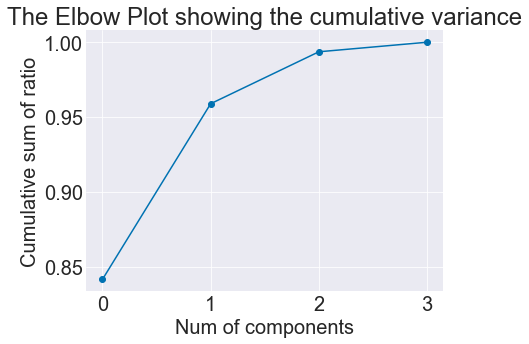

In [9]:
# test elbow plot
pca.elbow_plot()
plt.show()

**Question 1:** Based on the Iris elbow plot, how many principle components would you drop. Why?

**Question 1 answer:** It's suffice for us to drop two principle components and keep 2 principle components if we are to account for 95% percent of the proportional variance, because the cumulative variance of 2 components exceeds 0.95.

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [10]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = pca.pca_project(pcs_to_keep)
print(iris_proj.shape)

(150, 2)


##### Plot your PCA projected Iris data

- In the cell below, create a scatterplot of your PCA projected data.
- Label the x and y axes appropriately.

If everything goes well, you should see two distinct clusters

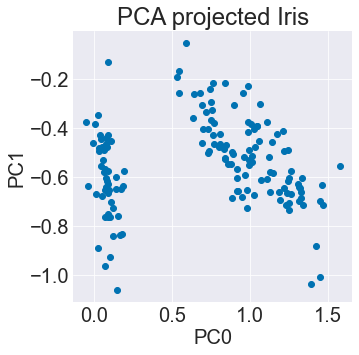

In [11]:
x = iris_proj[:, 0]
y = iris_proj[:, 1]

plt.figure(figsize = (5, 5))
plt.scatter(x, y)
plt.title("PCA projected Iris")
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legiable.

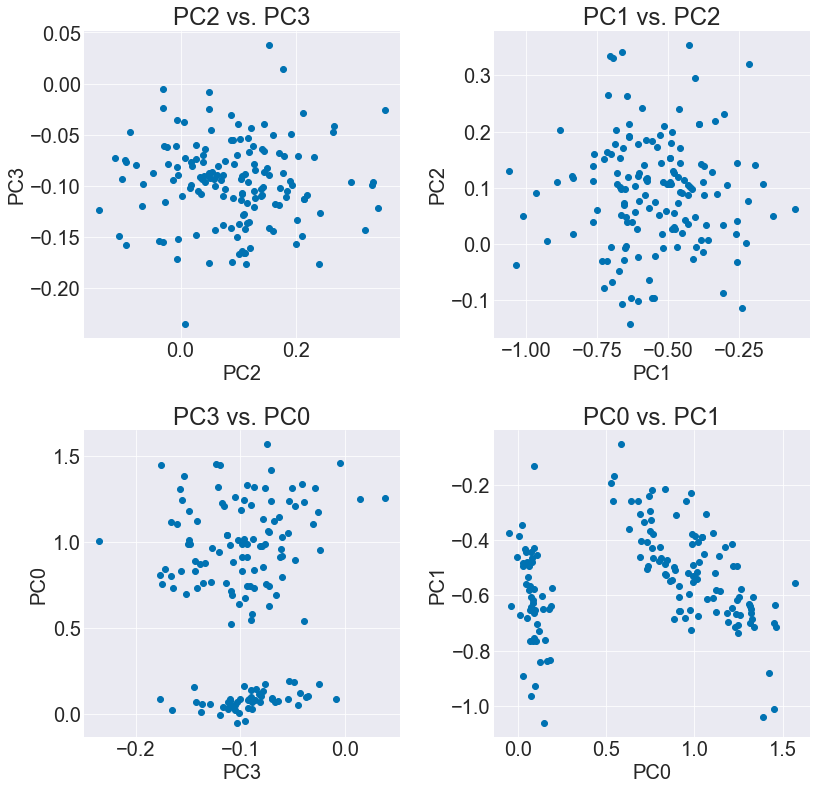

In [12]:
fig, axs = plt.subplots(2, 2, figsize = (13, 13))

#(top-left) PCs [2, 3]
iris_pro_0 = pca.pca_project([2, 3])
x0 = iris_pro_0[:, 0]
y0 = iris_pro_0[:, 1]
axs[0, 0].scatter(x0, y0)
axs[0, 0].set_title('PC2 vs. PC3')
axs[0, 0].set_xlabel('PC2')
axs[0, 0].set_ylabel('PC3')

#(top-right) PCs [1, 2]
iris_pro_1 = pca.pca_project([1, 2])
x1 = iris_pro_1[:, 0]
y1 = iris_pro_1[:, 1]
axs[0, 1].scatter(x1, y1)
axs[0, 1].set_title('PC1 vs. PC2')
axs[0, 1].set_xlabel('PC1')
axs[0, 1].set_ylabel('PC2')

#(bottom-left) PCs [3, 0]
iris_pro_2 = pca.pca_project([3, 0])
x2 = iris_pro_2[:, 0]
y2 = iris_pro_2[:, 1]
axs[1, 0].scatter(x2, y2)
axs[1, 0].set_title('PC3 vs. PC0')
axs[1, 0].set_xlabel('PC3')
axs[1, 0].set_ylabel('PC0')

#(bottom-right) PCs [0, 1]
iris_pro_3 = pca.pca_project([0, 1])
x3 = iris_pro_3[:, 0]
y3 = iris_pro_3[:, 1]
axs[1, 1].scatter(x3, y3)
axs[1, 1].set_title('PC0 vs. PC1')
axs[1, 1].set_xlabel('PC0')
axs[1, 1].set_ylabel('PC1')

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

**Question 2:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Question 2 answer:** Seen from the first graph, when we keep the principle components with lower eigenvalues, the data looks more chaotic and doesn't seem to form clusters, therefore hard to account for the changing variances. However, as we can see from the last graph, when we keep the top 2 principle components and drop the rests, the data shows clear clusters and it makes the result meaningful and more significant.

### 1e) Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables `sepalLength` (x), `sepalWidth` (y) of the Iris data **without any normalization**.
- In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your 'sepalLength', 'sepalWidth' plot created one cell above — including the data range and center).

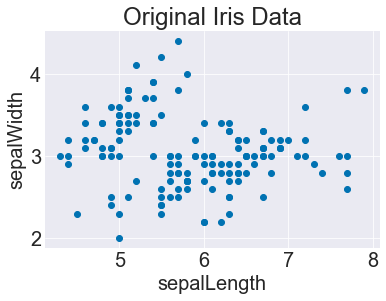

In [13]:
# Plot original iris data
plt.scatter(iris_data['sepalLength'], iris_data['sepalWidth'])
plt.title('Original Iris Data')
plt.xlabel('sepalLength')
plt.ylabel('sepalWidth')
plt.show()

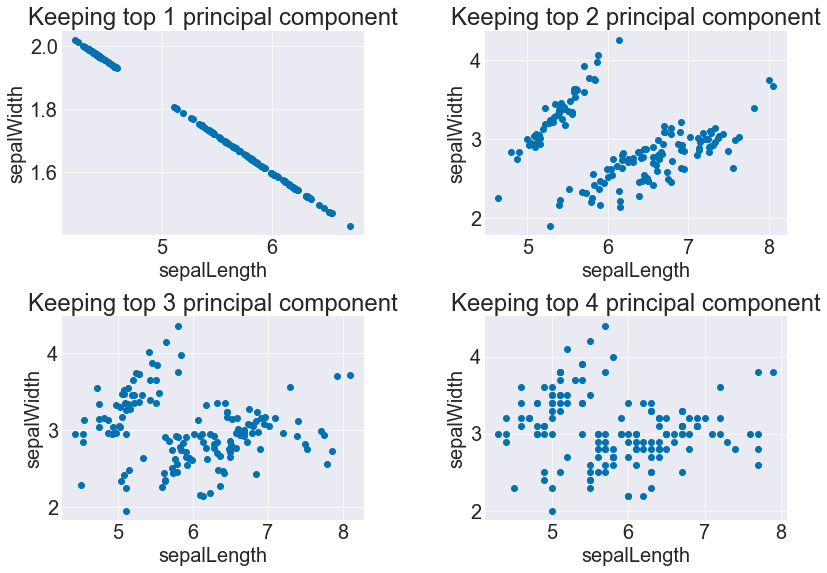

In [14]:
# 2x2 grid of scatter plots
fig1, axs1 = plt.subplots(2, 2, figsize = (13, 9))

#keeping the top 1 principal component
iris_pro_back_0 = pca.pca_then_project_back(1)
x0 = iris_pro_back_0[:, 0]
y0 = iris_pro_back_0[:, 1]
axs1[0, 0].scatter(x0, y0)
axs1[0, 0].set_title('Keeping top 1 principal component')
axs1[0, 0].set_xlabel('sepalLength')
axs1[0, 0].set_ylabel('sepalWidth')

#keeping the top 2 principal components
iris_pro_back_1 = pca.pca_then_project_back(2)
x1 = iris_pro_back_1[:, 0]
y1 = iris_pro_back_1[:, 1]
axs1[0, 1].scatter(x1, y1)
axs1[0, 1].set_title('Keeping top 2 principal component')
axs1[0, 1].set_xlabel('sepalLength')
axs1[0, 1].set_ylabel('sepalWidth')

#keeping the top 3 principal components
iris_pro_back_2 = pca.pca_then_project_back(3)
x2 = iris_pro_back_2[:, 0]
y2 = iris_pro_back_2[:, 1]
axs1[1, 0].scatter(x2, y2)
axs1[1, 0].set_title('Keeping top 3 principal component')
axs1[1, 0].set_xlabel('sepalLength')
axs1[1, 0].set_ylabel('sepalWidth')

#keeping the top 4 principal components
iris_pro_back_3 = pca.pca_then_project_back(4)
x3 = iris_pro_back_3[:, 0]
y3 = iris_pro_back_3[:, 1]
axs1[1, 1].scatter(x3, y3)
axs1[1, 1].set_title('Keeping top 4 principal component')
axs1[1, 1].set_xlabel('sepalLength')
axs1[1, 1].set_ylabel('sepalWidth')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


**Question 3:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Question 3 answer:** When we just keep 1 principal component, the projected data is one-dimensional; as the number of principal components increases, the projected data become less congregated and resemble more of the original data (seperated in directions); when we keep all of the principal components, the projected data is the same as the original data.

## Task 2: Eigenfaces. Perform PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 2a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [15]:
face_imgs = np.load('data/lfwcrop.npy')
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

FileNotFoundError: [Errno 2] No such file or directory: 'data/lfwcrop.npy'

### 2b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

In [ ]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    
    fig_1, axs_1 = plt.subplots(5, 5, figsize = (15, 15))
    n=0
    for i in range(5):
        for j in range(5):
            axs_1[i, j].imshow(face_imgs[n], cmap=plt.get_cmap('gray'))
            axs_1[i, j].set_title(face_names[n], fontdict={'fontsize':15})
            axs_1[i, j].set_xticks([])
            axs_1[i, j].set_yticks([])
            n+=1   
            
face_plot(face_imgs, face_names)


### 2c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

In [ ]:
plt.imshow(np.mean(face_imgs, axis = 0), cmap=plt.get_cmap('gray'))
plt.title('Mean Face')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

**Question 4:** What does the "mean face" image represent?

**Question 4 answer:** Mama it's chilly here!!!!!! The "mean face" shows the mean values of all faces, which represent the average appearance of people's faces, lthough blur, shows all facial features like the eyes, nose and mouth, which represents that those are the common features that are shared among most faces.

### 4d) Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [ ]:
# Your reshape code here

face_imgs_vec = face_imgs.reshape(face_imgs.shape[0], face_imgs.shape[1] * face_imgs.shape[2])

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

### 2e) Perform PCA on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_COV` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [ ]:
face_data = pd.DataFrame(face_imgs_vec)

print(face_data.head(5))

In [ ]:
pca_face = pca_cov.PCA_COV(face_data)
start = time.time()
pca_face.pca(range(4096))
runtime = (time.time() - start)

print('Runtime: ' + str(runtime) + ' s.')

### 2f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

In [ ]:
pca_face.elbow_plot(num_pcs_to_keep = 500, figsize = (13, 10))
plt.show()

### 2g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [ ]:
# this function is used to find the number of principal components to keep based on a given variance
def find_num_of_pc(pca_face, variance):
    for i in range(len(pca_face.cum_var)):
        if pca_face.cum_var[i] > variance:
                return (i+1)

# Number of principal components when 50% variance
pc50 = find_num_of_pc(pca_face, 0.5)

# Number of principal components when 70% variance
pc70 = find_num_of_pc(pca_face, 0.7)

# Number of principal components when 80% variance
pc80 = find_num_of_pc(pca_face, 0.8)

# Number of principal components when 95% variance
pc95 = find_num_of_pc(pca_face, 0.95)

print(pc50, pc70, pc80, pc95)

In [ ]:
def make_imgs(reconstucted_imgs, img_y = None, img_x = None):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    N = reconstucted_imgs.shape[0]
    if img_y == None or img_x == None:
        imgx = int(math.sqrt(reconstucted_imgs.shape[1]))
        reconstucted_imgs = reconstucted_imgs.reshape((N, imgx, imgx))
    else:
        reconstucted_imgs = reconstucted_imgs.reshape((N, img_y, img_x))
    return reconstucted_imgs

#### 50% variance face grid

In [ ]:
face_pro_back_50 = make_imgs(pca_face.pca_then_project_back(pc50))
face_plot(face_pro_back_50, face_names)

#### 70% variance face grid

In [ ]:
face_pro_back_70 = make_imgs(pca_face.pca_then_project_back(pc70))
face_plot(face_pro_back_70, face_names)

#### 80% variance face grid

In [ ]:
face_pro_back_80 = make_imgs(pca_face.pca_then_project_back(pc80))
face_plot(face_pro_back_80, face_names)

#### 95% variance face grid

In [ ]:
face_pro_back_95 = make_imgs(pca_face.pca_then_project_back(pc95))
face_plot(face_pro_back_95, face_names)

**Question 5:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Question 5 answer:** When we keep principal components based on 50% variance, the faces are very blur and in lack of recognizable features; as the number of principal components we keep increases, the projected images become more clear and resemble more of the original faces; when we keep principal components based on 95% variance, the faces are pretty much recognizable.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, etc) to inform your analysis and exploration. 

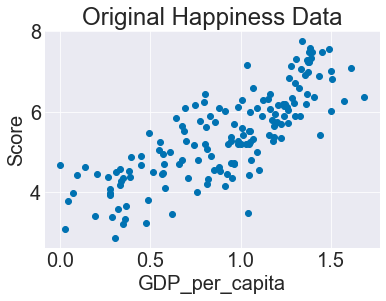

In [16]:
#Step 1: Load data and show it
happiness_data = pd.DataFrame(pd.read_csv("data/happiness.csv"))
plt.scatter(happiness_data['GDP_per_capita'], happiness_data['Score'])
plt.title('Original Happiness Data')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

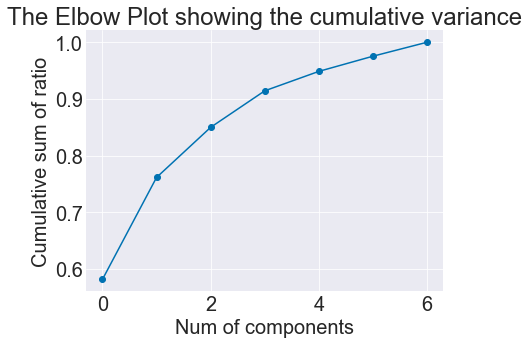

In [17]:
#Step 2: Perform PCA on data (with normalization)
pca_happiness = pca_cov.PCA_COV(happiness_data)
happiness_headers = list(happiness_data.columns[2:])
pca_happiness.pca(happiness_headers, normalize=True)

#Step 3: make Elbow plot
pca_happiness.elbow_plot()
plt.show()

*Now, we can choose the number of principal components we keep based on the cumulative variace we want. For example, if we want a variance of 90%, we should keep 3 principal components. Now I'd like to take look at all the projected data with different number of top components kept (from 1 to 6).*

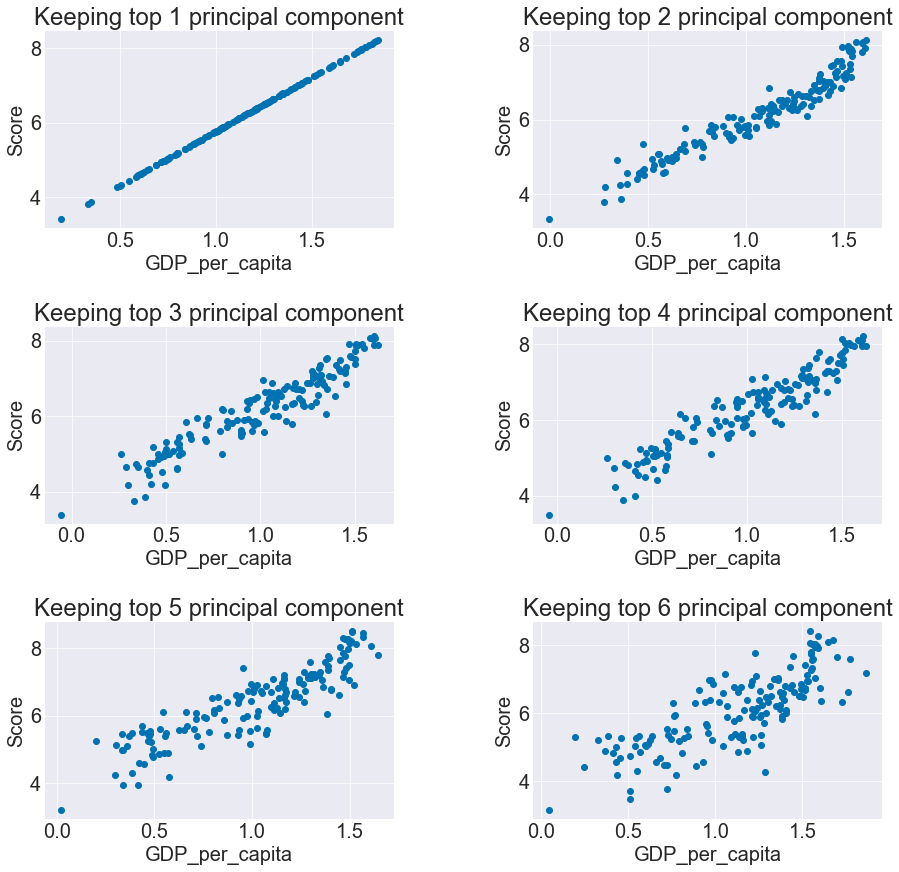

In [18]:
#Step 4: Choose different number of top components, and project back the data

# 3*2 grid of scatter plots
fig_h, axs_h = plt.subplots(3, 2, figsize = (15, 14.5))
pro_back = []

#I save the projected data with different numbers of principle components kept into a list
for num in range(6):
    pro_back.append(pca_happiness.pca_then_project_back(num+1))
n = 0

for i in range(3):
    for j in range(2):
        y0 = pro_back[n][:, 0]
        x0 = pro_back[n][:, 1]
        axs_h[i, j].scatter(x0, y0)
        axs_h[i, j].set_title('Keeping top '+ str((n+1)) +' principal component')
        axs_h[i, j].set_xlabel('GDP_per_capita')
        axs_h[i, j].set_ylabel('Score')
        n+=1
    
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

*When we just keep 1 principal component, the projected data is one-dimensional; as the number of principal components we keep increases, the projected data become less congregated and resemble more of the original data; when we keep all of the principal components, the projected data is the same as the original data.*

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

(923, 900, 4)


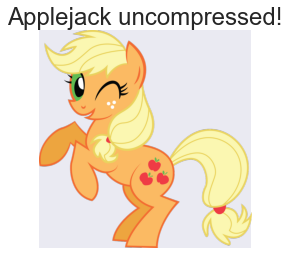

In [19]:
#Step 1: Load the original image and show it
apple = plt.imread('data/Applejack.png')
print(apple.shape)
plt.imshow(apple)
plt.title('Applejack uncompressed!')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

Runtime: 22.91595196723938 s.


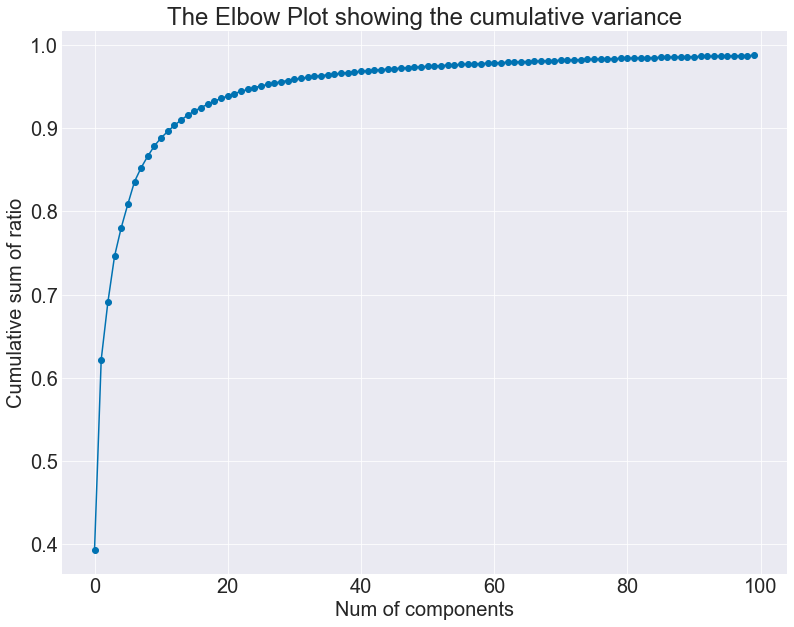

In [20]:
#Step 2: Reshape the data
apple_length = apple.shape[0]
apple_width = apple.shape[1]
apple_thickness = apple.shape[2]
apple_vec = apple.reshape(apple_length, apple_width* apple_thickness)

#Step 3: Perform PCA on processed data
apple_data = pd.DataFrame(apple_vec)

pca_apple = pca_cov.PCA_COV(apple_data)
start_apple = time.time()

pca_apple.pca(range(apple_width*apple_thickness))
runtime_apple = (time.time() - start_apple)

print('Runtime: ' + str(runtime_apple) + ' s.')

#Step 4: Make elbow plot
pca_apple.elbow_plot(num_pcs_to_keep = 100, figsize = (13, 10))
plt.show()

In [21]:
#Step 5: Choose numbers of principle components
    # Number of principal components when 60% variance
apple_pc60 = find_num_of_pc(pca_apple, 0.6)

    # Number of principal components when 80% variance
apple_pc80 = find_num_of_pc(pca_apple, 0.8)

    # Number of principal components when 98% variance
apple_pc98 = find_num_of_pc(pca_apple, 0.98)

NameError: name 'find_num_of_pc' is not defined

In [ ]:
#Step 6: Project back data and make image
apple_back_60 = make_imgs(pca_apple.pca_then_project_back(apple_pc60), apple_width, apple_thickness)
apple_back_60 = np.clip(apple_back_60, 0, 1)
plt.imshow(apple_back_60)
plt.title('Applejack - 60% variance')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [ ]:
apple_back_80 = make_imgs(pca_apple.pca_then_project_back(apple_pc80), apple_width, apple_thickness)
apple_back_80 = np.clip(apple_back_80, 0, 1)
plt.imshow(apple_back_80)
plt.title('Applejack - 80% variance')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [ ]:
apple_back_98 = make_imgs(pca_apple.pca_then_project_back(apple_pc98), apple_width, apple_thickness)
apple_back_98 = np.clip(apple_back_98, 0, 1)
plt.imshow(apple_back_98)
plt.title('Applejack - 98% variance')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.